In [253]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [255]:
digits = datasets.load_digits()

X = digits.images / 16  #정규화
y = to_categorical(digits.target)  #원핫인코딩

In [257]:
plt.figure(figsize=(6, 3))

<Figure size 600x300 with 0 Axes>

<Figure size 600x300 with 0 Axes>

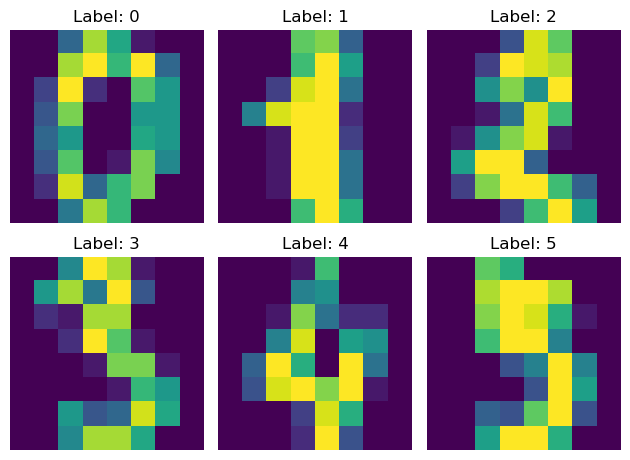

In [259]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(digits.images[i])
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
model = Sequential()

model.add(Flatten(input_shape=(8, 8, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,226 (67.29 KB)

 Trainable params: 17,226 (67.29 KB)

 Non-trainable params: 0 (0.00 B)

In [265]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2)

loss, accuracy = model.evaluate(X_test, y_test)
print("accuracy:", accuracy)

Epoch 1/10
45/45 - 1s - 21ms/step - accuracy: 0.5546 - loss: 1.8361
Epoch 2/10
45/45 - 0s - 3ms/step - accuracy: 0.8789 - loss: 0.7725
Epoch 3/10
45/45 - 0s - 3ms/step - accuracy: 0.9151 - loss: 0.3640
Epoch 4/10
45/45 - 0s - 3ms/step - accuracy: 0.9443 - loss: 0.2426
Epoch 5/10
45/45 - 0s - 3ms/step - accuracy: 0.9596 - loss: 0.1877
Epoch 6/10
45/45 - 0s - 3ms/step - accuracy: 0.9708 - loss: 0.1517
Epoch 7/10
45/45 - 0s - 3ms/step - accuracy: 0.9729 - loss: 0.1267
Epoch 8/10
45/45 - 0s - 3ms/step - accuracy: 0.9715 - loss: 0.1129
Epoch 9/10
45/45 - 0s - 2ms/step - accuracy: 0.9798 - loss: 0.0937
Epoch 10/10
45/45 - 0s - 2ms/step - accuracy: 0.9819 - loss: 0.0852
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9735 - loss: 0.0872  
accuracy: 0.9638888835906982


In [267]:
image = X_test[2]
real_label = np.argmax(y_test[2])
pred_label = np.argmax(model.predict(image.reshape(1, 8, 8, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


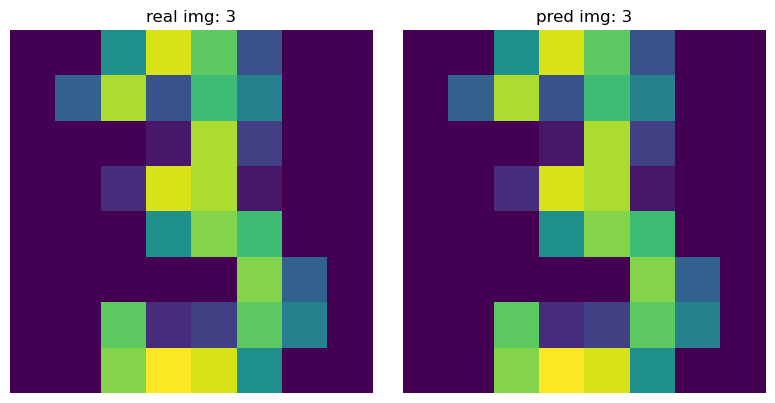

In [269]:
plt.figure(figsize=(8, 4))

#real
plt.subplot(1, 2, 1)
plt.imshow(image.reshape(8, 8))
plt.title(f"real img: {real_label}")
plt.axis('off')

#pred
plt.subplot(1, 2, 2)
plt.imshow(image.reshape(8, 8))
plt.title(f"pred img: {pred_label}")
plt.axis('off')

plt.tight_layout()
plt.show()